# Fake or Real news
## 1.Procesing the data.
Of course, first I load the data to the notebook

In [1]:
import pandas as pd
df = pd.read_csv('train_B_text.csv')
df.head()

,Id,Title,Fake/Real
0,0,Begin Again trailer with Keira Knighley VIDEO\n,real
1,1,San Diegans share what brightens their day on ...,real
2,2,Gold Prices Hit Five-Week Low Below $1300 an O...,fake
3,3,Healthcare Innovation: Promising Vaccine in De...,fake
4,4,Twitter Introduces Photo Tagging and Collage U...,fake


In [2]:
#Drop the id column
df = df.drop('Id', axis=1)
df

,Title,Fake/Real
0,Begin Again trailer with Keira Knighley VIDEO\n,real
1,San Diegans share what brightens their day on ...,real
2,Gold Prices Hit Five-Week Low Below $1300 an O...,fake
3,Healthcare Innovation: Promising Vaccine in De...,fake
4,Twitter Introduces Photo Tagging and Collage U...,fake
...,...,...
2443,Madonna to Adapt Rebecca Walker's Novella\n,fake
2444,Drew Barrymore Welcomes Second Baby!\n,real
2445,[Weekend Poll] Are You Keeping Your Amazon Pri...,real
2446,5 Reasons Why You'll Want To Workout In OMsign...,real


Find out how many rows the dataset contains and confirm that there are no missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      2448 non-null   object
 1   Fake/Real  2448 non-null   object
dtypes: object(2)
memory usage: 38.4+ KB


Check for duplicate rows in the datase

In [4]:
df.groupby('Fake/Real').describe()

Title                                                               
          count unique                                                top freq
Fake/Real                                                                     
fake       1048    930  'Transcendence' Review: The Film Receives Mixe...    3
real       1400   1399  Country's GDP Rises to US$510 Billion in 24 Ye...    2

There are some duplicate rows. I get rid of those.

In [5]:
df = df.drop_duplicates()
df.groupby('Fake/Real').describe()

Title                                                               
          count unique                                                top freq
Fake/Real                                                                     
fake        930    930  Gold Prices Hit Five-Week Low Below $1300 an O...    1
real       1399   1399    Begin Again trailer with Keira Knighley VIDEO\n    1

Now, I get rid of the 'fake' and 'real' labels.

In [6]:
df.loc[:, 'Fake/Real'] = df['Fake/Real'].map({'fake': 0, 'real': 1})
df

C:\Users\juanc\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


,Title,Fake/Real
0,Begin Again trailer with Keira Knighley VIDEO\n,1
1,San Diegans share what brightens their day on ...,1
2,Gold Prices Hit Five-Week Low Below $1300 an O...,0
3,Healthcare Innovation: Promising Vaccine in De...,0
4,Twitter Introduces Photo Tagging and Collage U...,0
...,...,...
2441,What will Smithfield's Bria Kelly sing this we...,1
2442,Sports Phenomenon: Underdog Team's Cinderella ...,0
2444,Drew Barrymore Welcomes Second Baby!\n,1
2445,[Weekend Poll] Are You Keeping Your Amazon Pri...,1


Checking that the transformation has been succesful

In [7]:
df = df.drop_duplicates()
df.groupby('Fake/Real').describe()

Title                                                               
          count unique                                                top freq
Fake/Real                                                                     
0           930    930  Gold Prices Hit Five-Week Low Below $1300 an O...    1
1          1399   1399    Begin Again trailer with Keira Knighley VIDEO\n    1

I divide the data into train and validation. Validation data will be used to choose the final model.

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Title'], df['Fake/Real'], test_size=0.1, random_state=42)  

Use CountVectorizer to vectorize the text in the DataFrame's "Text" column using a built-in dictionary of stop words. The min_df parameter ignore word that appear less than x times, and its an hyperparameter of the model. I will define multiples tokenizers to test the best value of this hyperparameter for this exercise.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_1 = CountVectorizer( stop_words='english', min_df=1, strip_accents='unicode')
vectorizer_2 = CountVectorizer( stop_words='english', min_df=2, strip_accents='unicode')
vectorizer_5 = CountVectorizer( stop_words='english', min_df=5, strip_accents='unicode')
vectorizer_10 = CountVectorizer( stop_words='english', min_df=10, strip_accents='unicode')
vectorizer_20 = CountVectorizer( stop_words='english', min_df=20, strip_accents='unicode')

#example of the tokenization
test_string = x_train[0]
print ("Example: " + test_string +"\n")
print ("Preprocessed: " + vectorizer_10.build_preprocessor()(test_string)+"\n")
print ("Tokenized:" + str(vectorizer_10.build_tokenizer()(test_string))+"\n")
print ("Analyzed data string:" + str(vectorizer_10.build_analyzer()(test_string))+"\n")

Example: Begin Again trailer with Keira Knighley VIDEO


Preprocessed: begin again trailer with keira knighley video


Tokenized:['Begin', 'Again', 'trailer', 'with', 'Keira', 'Knighley', 'VIDEO']

Analyzed data string:['begin', 'trailer', 'keira', 'knighley', 'video']



In addition to creating sparse matrices of vectorized text, Countvectorizer converts text to lowercase, removes stop words and punctuation characters, and more.

In [10]:
#Process and convert data
X_train_1 = vectorizer_1.fit_transform(x_train)
X_test_1 = vectorizer_1.transform(x_test)

X_train_2 = vectorizer_2.fit_transform(x_train)
X_test_2 = vectorizer_2.transform(x_test)

X_train_5 = vectorizer_5.fit_transform(x_train)
X_test_5 = vectorizer_5.transform(x_test)

X_train_10 = vectorizer_10.fit_transform(x_train)
X_test_10 = vectorizer_10.transform(x_test)

X_train_20 = vectorizer_20.fit_transform(x_train)
X_test_20 = vectorizer_20.transform(x_test)

I plot an hystogram to have a better idea of the distribution of words in the data

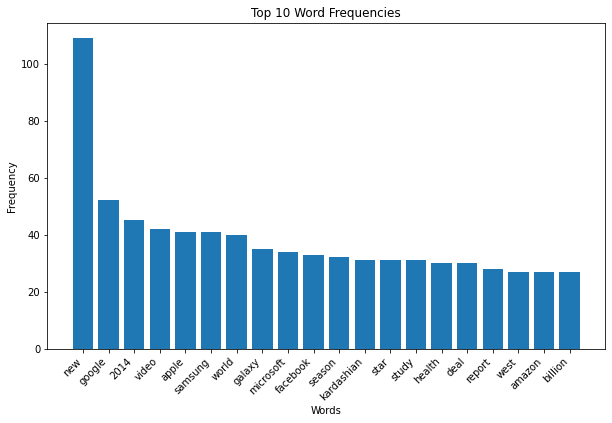

In [11]:
import matplotlib.pyplot as plt

# Get the sum of occurrences of each word (term frequency)
term_frequencies_10 = X_train_10.toarray().sum(axis=0)

# Get the feature names (words corresponding to each column)
words_10 = vectorizer_10.get_feature_names()

word_freq_10 = pd.DataFrame(list(zip(words_10, term_frequencies_10)), columns=["Word", "Frequency"])

# Sort the words by frequency in descending order
word_freq_10 = word_freq_10.sort_values(by="Frequency", ascending=False)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(word_freq_10["Word"][:20], word_freq_10["Frequency"][:20])  # Top 10 words
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Word Frequencies")
plt.show()

# 2. Linear models: Logistic-regression model

I first try a logistic-regression model. The loss function is the log_loss or binary cross entropy.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.exceptions import ConvergenceWarning
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=ConvergenceWarning)

def plot_training_validation(train_data, train_labels, val_data, val_labels, max_iter=100, step_interval=50):
    # Initialize logistic regression model
    model = LogisticRegression(max_iter=1, warm_start=True)

    # Initialize lists to store values
    train_accuracy = []
    val_accuracy = []
    loss_values = []

    # Train the model and record metrics at each step_interval
    for i in range(1, max_iter + 1):
        model.fit(train_data, train_labels)
        
        # Calculate the loss (log loss)
        train_probs = model.predict_proba(train_data)
        loss = log_loss(train_labels, train_probs)
        loss_values.append(loss)
        
        # Calculate accuracy on train data
        train_pred = model.predict(train_data)
        train_acc = accuracy_score(train_labels, train_pred)
        train_accuracy.append(train_acc)
        
        # Calculate accuracy on validation data
        val_pred = model.predict(val_data)
        val_acc = accuracy_score(val_labels, val_pred)
        val_accuracy.append(val_acc)
        
    # Print final validation accuracy
    print(f"Final Validation Accuracy: {val_accuracy[-1]:.4f}")
    # Plot loss, train and validation accuracy over the iterations
    plt.figure(figsize=(10, 6))

    # Loss plot
    plt.subplot(2, 1, 1)
    plt.plot(range(1, max_iter + 1), loss_values, label='Loss', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss over Training Iterations')

    # Accuracy plot
    plt.subplot(2, 1, 2)
    plt.plot(range(1, max_iter + 1), train_accuracy, label='Train Accuracy', color='blue')
    plt.plot(range(1, max_iter + 1), val_accuracy, label='Validation Accuracy', color='green')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Training Iterations')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

### Not getting rid of words

Final Validation Accuracy: 0.7511


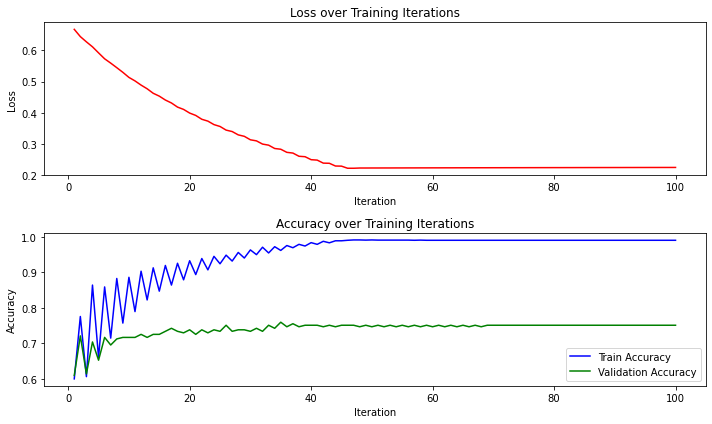

In [13]:
plot_training_validation(X_train_1, y_train, X_test_1, y_test)

### Getting rid of words that only appears once

Final Validation Accuracy: 0.7425


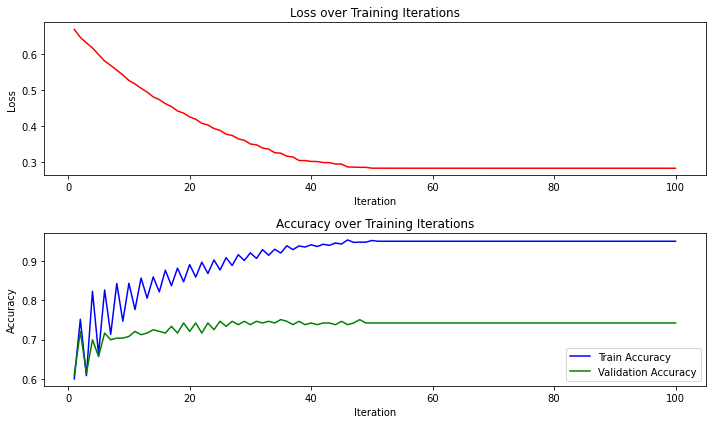

In [14]:
plot_training_validation(X_train_2, y_train, X_test_2, y_test)

### Getting rid of words that appears less than 5 times

Final Validation Accuracy: 0.7167


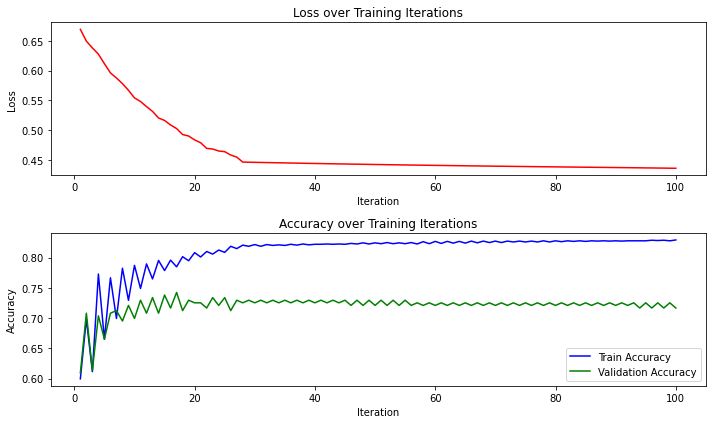

In [15]:
plot_training_validation(X_train_5, y_train, X_test_5, y_test)

### Getting rid of words that appears less than 10 times

Final Validation Accuracy: 0.6824


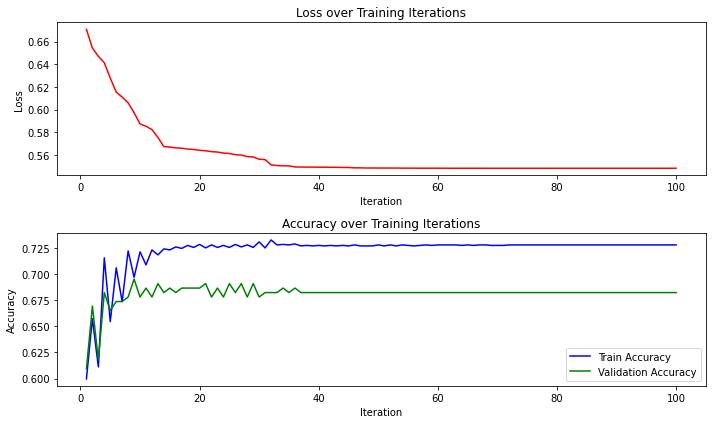

In [16]:
plot_training_validation(X_train_10, y_train, X_test_10, y_test)

### Getting rid of words that appears less than 20 times

Final Validation Accuracy: 0.6352


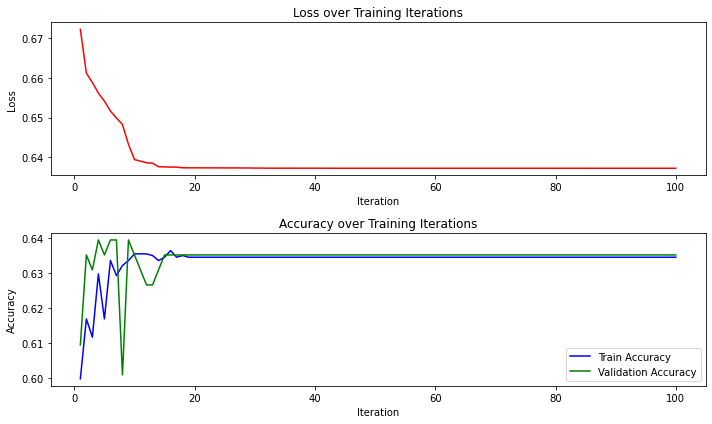

In [17]:
plot_training_validation(X_train_20, y_train, X_test_20, y_test)

## Analysis

The results indicate that the best option (for the logistic-regression model) is not getting rid of words. The value of the accuracy in validation is then 0.7511. The predicted value for the accuracy in test will be then 0.751 ±  0.028

# 3. Linear models: Naive Bayesian model

In [18]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

def draw_confusion(y,yhat,labels):
    cm = confusion_matrix(y, yhat)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.matshow(cm.T)
    plt.title('Confusion matrix',size=20)
    ax.set_xticklabels([''] + labels, size=20)
    ax.set_yticklabels([''] + labels, size=20)
    plt.ylabel('Predicted',size=20)
    plt.xlabel('True',size=20)
    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[i,j], va='center', ha='center',color='white',size=20)
    fig.set_size_inches(7,7)
    plt.show()


def Bayesian_Report(train_data, train_labels, val_data, val_labels):
    # Initialize logistic regression model
    model = BernoulliNB()
    model.fit(train_data,train_labels)
    y_hat2 = model.predict(train_data)
    y_hat = model.predict(val_data)
    print("Train matrix:")
    draw_confusion(train_labels,y_hat2,['Fake', 'Real'])
    print ("classification accuracy:",accuracy_score(y_hat, val_labels))
    print("Validation matrix:")
    draw_confusion(val_labels,y_hat,['Fake', 'Real'])
    print ("Classification Report:")
    print (classification_report(y_hat,np.array(val_labels)))


### Not getting rid of words

Train matrix:


C:\Users\juanc\AppData\Local\Temp/ipykernel_4388/858987864.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\juanc\AppData\Local\Temp/ipykernel_4388/858987864.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


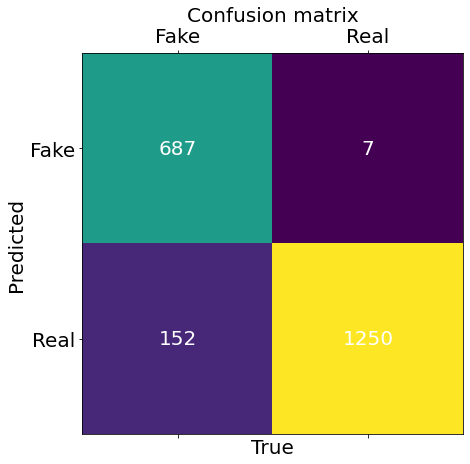

classification accuracy: 0.7682403433476395
Validation matrix:


C:\Users\juanc\AppData\Local\Temp/ipykernel_4388/858987864.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\juanc\AppData\Local\Temp/ipykernel_4388/858987864.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


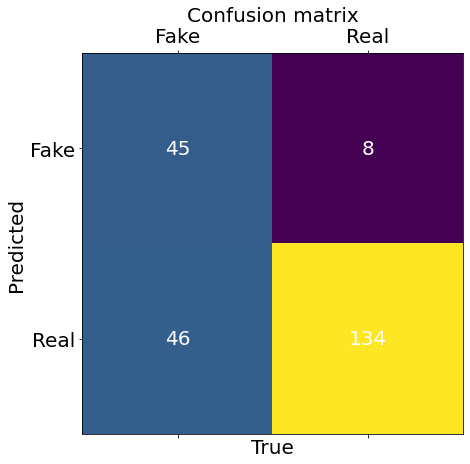

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.85      0.62        53
           1       0.94      0.74      0.83       180

    accuracy                           0.77       233
   macro avg       0.72      0.80      0.73       233
weighted avg       0.84      0.77      0.79       233



In [19]:
Bayesian_Report(X_train_1, y_train, X_test_1, y_test)

I dont like at all this matrix. It seems that there is sometrhing wrong here as the model can not classify correctly fake data.

### Getting rid of words that only appears once

Train matrix:


C:\Users\juanc\AppData\Local\Temp/ipykernel_4388/858987864.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\juanc\AppData\Local\Temp/ipykernel_4388/858987864.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


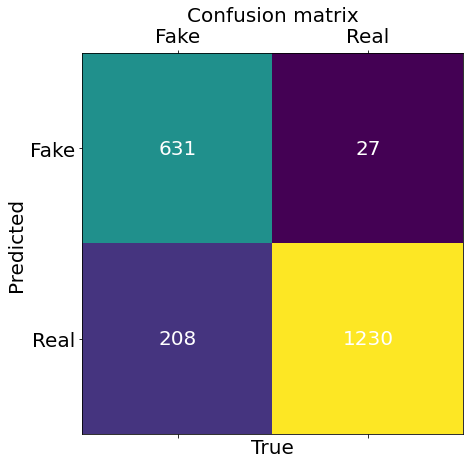

C:\Users\juanc\AppData\Local\Temp/ipykernel_4388/858987864.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size=20)
C:\Users\juanc\AppData\Local\Temp/ipykernel_4388/858987864.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size=20)


classification accuracy: 0.7467811158798283
Validation matrix:


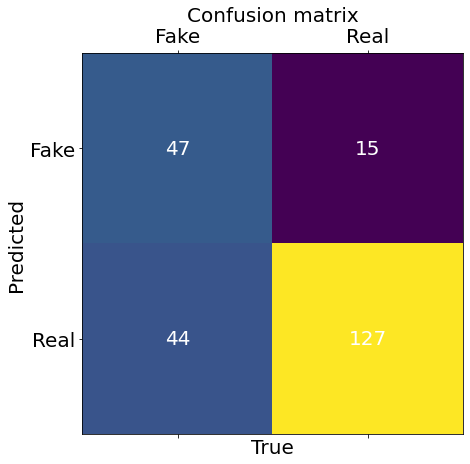

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.76      0.61        62
           1       0.89      0.74      0.81       171

    accuracy                           0.75       233
   macro avg       0.71      0.75      0.71       233
weighted avg       0.79      0.75      0.76       233



In [20]:
Bayesian_Report(X_train_2, y_train, X_test_2, y_test)

## Analysis

Again, the results indicate that the best option (for the logistic-regression model) is not getting rid of words. The value of the accuracy in validation is then 0.768, higher that for the logistic-regression model. The predicted value for the accuracy in test will be then 0.768 ±  0.028.

However, it seems that the model has issues classifing the data that is fake.

# Final. Applying the model to the data

In [21]:
#Loading the data.
df_f = pd.read_csv('test_B_text.csv')
df_f = df_f.drop('Id', axis=1)
df_f.head()

,Title
0,Rare Blue Diamond Found in African Mine\n
1,AC/DC's Future Uncertain Amid Retirement Rumors\n
2,First possible 'exomoon' spotted\n
3,Humanitarian Aid: Volunteers Bring Relief to D...
4,New Earth-like planet discovered that could su...


In [22]:
#Preparing the data for the model and training the model with the full training set (no validation).
x = df_f['Title']

x_train = df['Title']
x_train = vectorizer_1.fit_transform(x_train)
x = vectorizer_1.transform(x)

In [23]:
#Cell for applying the model (once the model is choosen.

In [24]:
#Applying the model to the data
y = model.predict(x)
label_mapping = {0: "fake", 1: "real"}
y= np.vectorize(label_mapping.get)(y)
y

NameError: name 'model' is not defined